<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Séries Temporais
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Wrangling;</li>
  <li>Decomposição.</li>
</ol>

---

# **Exercícios**

## 1\. Correlação entre consumo de energia elétrica e temperatura

Neste exercício, vamos correlacionar a base de dados de consumo de energia elétrica vista em aula com uma base de dados de temperatura média das tres maiores cidades do sudeste: **São Paulo**, **Rio de Janeiro** e **Belo Horizonte**. Os dados de temperatura estão presente neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv) e foram extraídos diretamento do [site](https://portal.inmet.gov.br) do instituto nacional de meteorologias (INMTE), órgão do governo vinculado ao ministério de agricultura, pecuária e abastecimento.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### **1.1. Energia**

Carregue os dados de **energia** com o código abaixo e responda as perguntas abaixo:

In [2]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [3]:
energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [4]:
energia.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [5]:
energia.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


Responda:

 - Qual é a granularidade da base de dados: Mês a mês.
 - Qual é o intervalo de tempo (min/max): Min = 2004-01-01; Max = 2020-12-12. Total de 16 anos.

### **1.2. Temperatura**

Carregue os dados de **temperatura** com o código abaixo e responda as perguntas abaixo:

In [6]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv' -O 'temperatura.csv'

In [7]:
temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [8]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [9]:
temperatura.tail()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
896,2020-12-27,20,24.0,23.0
897,2020-12-28,21,25.0,23.0
898,2020-12-29,22,27.0,23.0
899,2020-12-30,24,27.0,23.0
900,2020-12-31,23,29.0,24.0


Responda:

 - Qual é a granularidade da base de dados: Dia a dia.
 - Qual é o intervalo de tempo (min/max): Min = 2018-07-15; Max = 2020-12-31. Total de 900 dias entre o min e o max.

## 2\. Processamento

### **2.1. Energia**

Processe o dataframe `energia`:

 - **a.** Atributa ao index a coluna temporal.

In [10]:
# resposta da questão 2.1.a
energia = energia.set_index(keys=['referencia'])

 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [35]:
# resposta da questão 2.1.b
energia_19_20 = energia['2019':'2020']

In [36]:
energia_19_20['2019':'2020'].shape

(24, 3)

 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

### **2.2. Temperatura**

Processe o dataframe `temperatura`:

 - **a.** Atributa ao index a coluna temporal.

In [14]:
# resposta da questão 2.2.a
temperatura = temperatura.set_index(keys=['referencia'])

 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [16]:
# resposta da questão 2.1.b
temperatura_19_20 = temperatura['2019':'2020']

 - **c.** Remova todas as linhas que apresentem pelo menos um valores nulo.

In [17]:
# resposta da questão 2.2.c
temperatura_19_20.isnull().any()

temp-media-sp    False
temp-media-rj     True
temp-media-mg     True
dtype: bool

In [19]:
temperatura_19_20 = temperatura_19_20.dropna()

In [20]:
temperatura_19_20.isnull().any()

temp-media-sp    False
temp-media-rj    False
temp-media-mg    False
dtype: bool

 - **d.** Combine as três colunas de temperatura em uma só chamada de `temp-media` e agregadas pela **média** (obtendo assim uma temperatura média aproximada da região sudeste).

In [21]:
# resposta da questão 2.2.d
temperatura_19_20['temp-media'] = temperatura_19_20[['temp-media-sp', 'temp-media-rj', 'temp-media-mg']].mean(axis=1)


In [22]:
temperatura_19_20.head()

,temp-media-sp,temp-media-rj,temp-media-mg,temp-media
referencia,,,,
2019-01-01,22,28.0,21.0,23.666667
2019-01-02,25,28.0,24.0,25.666667
2019-01-03,26,31.0,24.0,27.000000
2019-01-04,23,31.0,22.0,25.333333
2019-01-05,21,28.0,23.0,24.000000


 - **f.** Reamostre o dataframe para que sua granularidade seja a mesma dos dados de consumo de energia elétrica. Utilize a **média** como métrica de agregação.

In [27]:
# resposta da questão 2.2.f
temp_19_20_resam = temperatura_19_20.resample(rule='m').mean()

In [28]:
temp_19_20_resam.shape

(24, 4)

 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

## 3\. Correlação

### **3.1. Consumo residencial**

 - **a.** Gere um gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

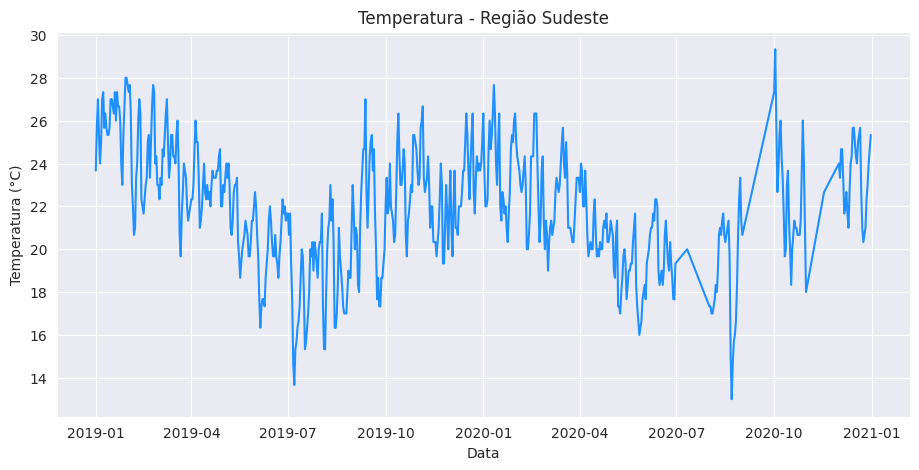

In [34]:
# resposta da questão 3.1.b
with sns.axes_style('darkgrid'):
  grafico = sns.lineplot(data=temperatura_19_20, x='referencia', y='temp-media', color='dodgerblue')
  grafico.set(title='Temperatura - Região Sudeste', xlabel='Data', ylabel='Temperatura (°C)')
  grafico.figure.set_size_inches(11, 5)

 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **residencial**.

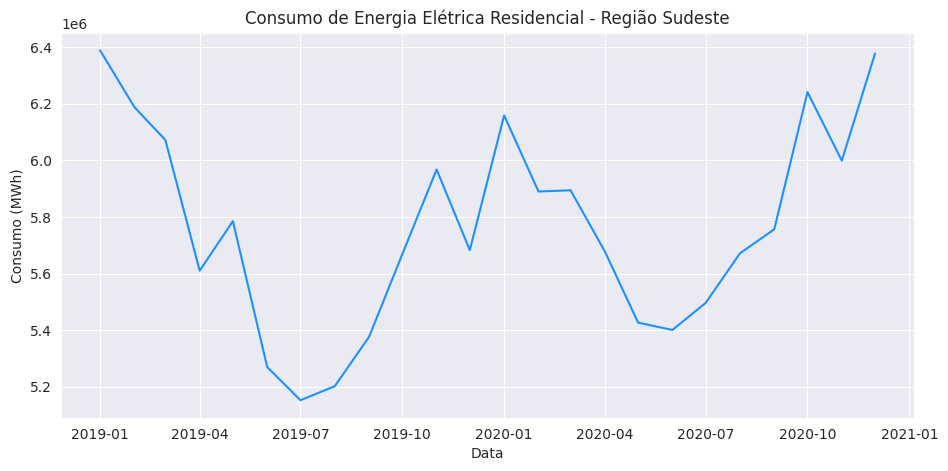

In [40]:
# resposta da questão 3.1.b
with sns.axes_style('darkgrid'):
  grafico = sns.lineplot(data=energia_19_20, x='referencia', y='residencial', color='dodgerblue')
  grafico.set(title='Consumo de Energia Elétrica Residencial - Região Sudeste', xlabel='Data', ylabel='Consumo (MWh)')
  grafico.figure.set_size_inches(11, 5)

 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **residencial** e a **temperatura** média agregada `temp-media`.

In [41]:
# resposta da questão 3.1.c
coeficiente_pearson = np.corrcoef(energia_19_20['residencial'], temp_19_20_resam['temp-media'])
print(coeficiente_pearson)

[[1.         0.82427182]
 [0.82427182 1.        ]]


 - **d.** Baseado nas respostas dos items anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **residencial**?

**Resposta:** Definitivamente, há uma correlação positiva significativa, r = 0,82, entre o consumo de energia elétrica residencial e a temperatura. Em termos simples, à medida que a temperatura sobe, o consumo de energia elétrica acompanha o mesmo padrão, aumentando proporcionalmente, e o inverso também é observado. Além disso, é evidente que as tendências e padrões sazonais nos gráficos de linha para a temperatura e o consumo de energia elétrica exibem notável semelhança.

### **3.2. Consumo comercial**

Repita o exercício 3.1. para dados de consumo de energia elétrica **comercial**.

Gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

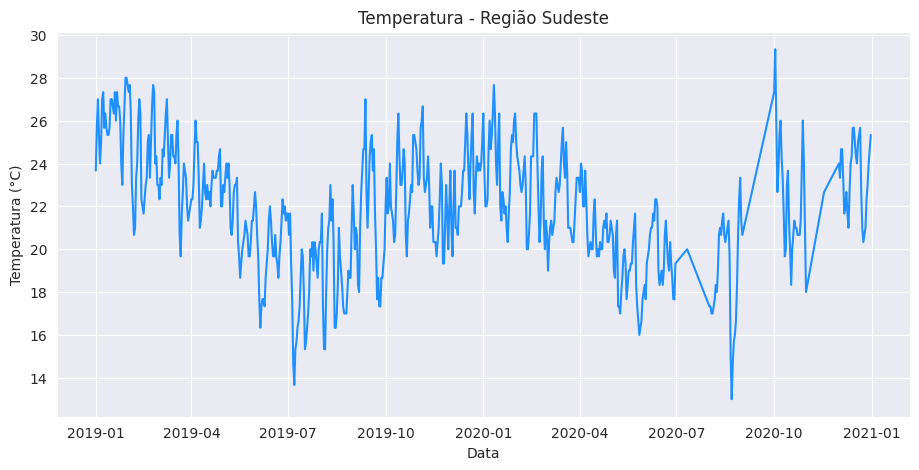

In [44]:
with sns.axes_style('darkgrid'):
  grafico = sns.lineplot(data=temperatura_19_20, x='referencia', y='temp-media', color='dodgerblue')
  grafico.set(title='Temperatura - Região Sudeste', xlabel='Data', ylabel='Temperatura (°C)')
  grafico.figure.set_size_inches(11, 5)

Gráfico de linha para a série temporal do consumo de energia **comercial**.

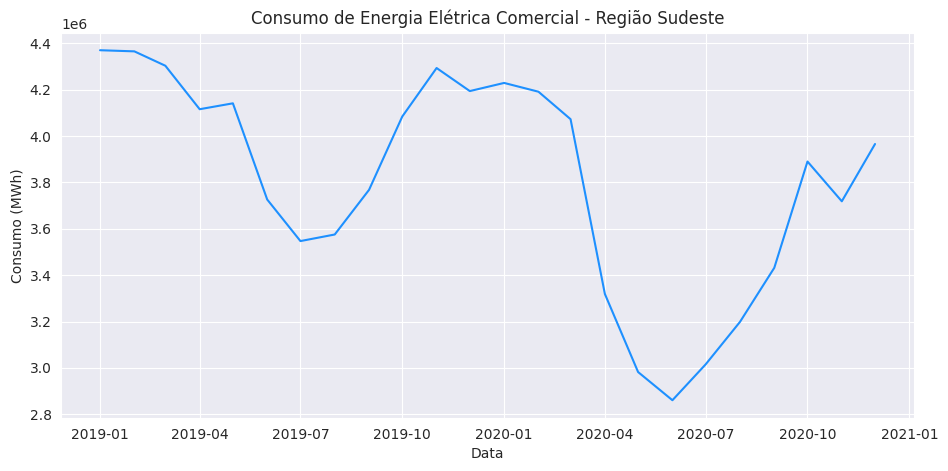

In [42]:
with sns.axes_style('darkgrid'):
  grafico = sns.lineplot(data=energia_19_20, x='referencia', y='comercial', color='dodgerblue')
  grafico.set(title='Consumo de Energia Elétrica Comercial - Região Sudeste', xlabel='Data', ylabel='Consumo (MWh)')
  grafico.figure.set_size_inches(11, 5)

Coeficiente de Pearson entre o consumo de energia elétrica **comercial** e a **temperatura** média agregada `temp-media`.

In [43]:
coeficiente_pearson = np.corrcoef(energia_19_20['comercial'], temp_19_20_resam['temp-media'])
print(coeficiente_pearson)

[[1.         0.82350289]
 [0.82350289 1.        ]]


De maneira análoga à avaliação do consumo de energia elétrica residencial, pode-se confirmar que há uma correlação positiva robusta entre o consumo de energia elétrica comercial e a temperatura, r = 0,82. Em outras palavras, à medida que a temperatura aumenta, observa-se um correspondente aumento no consumo de energia elétrica, e vice-versa. Adicionalmente, é notável que as tendências e os padrões sazonais nos gráficos de linha para a temperatura e o consumo de energia elétrica também apresentam uma marcante similaridade.

### **3.3. Consumo industrial**

Repita o exercício 3.1. para dados de consumo de energia elétrica **industrial**.

---

Gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

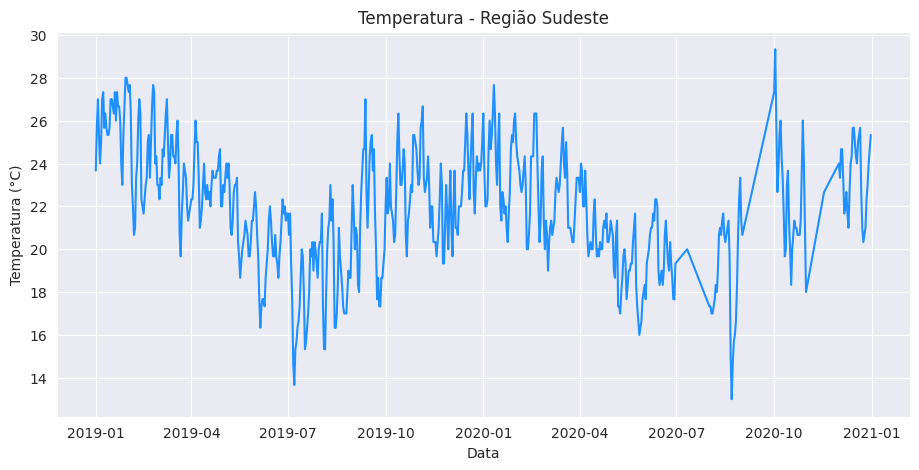

In [ ]:
with sns.axes_style('darkgrid'):
  grafico = sns.lineplot(data=temperatura_19_20, x='referencia', y='temp-media', color='dodgerblue')
  grafico.set(title='Temperatura - Região Sudeste', xlabel='Data', ylabel='Temperatura (°C)')
  grafico.figure.set_size_inches(11, 5)

Gráfico de linha para a série temporal do consumo de energia **industrial**.

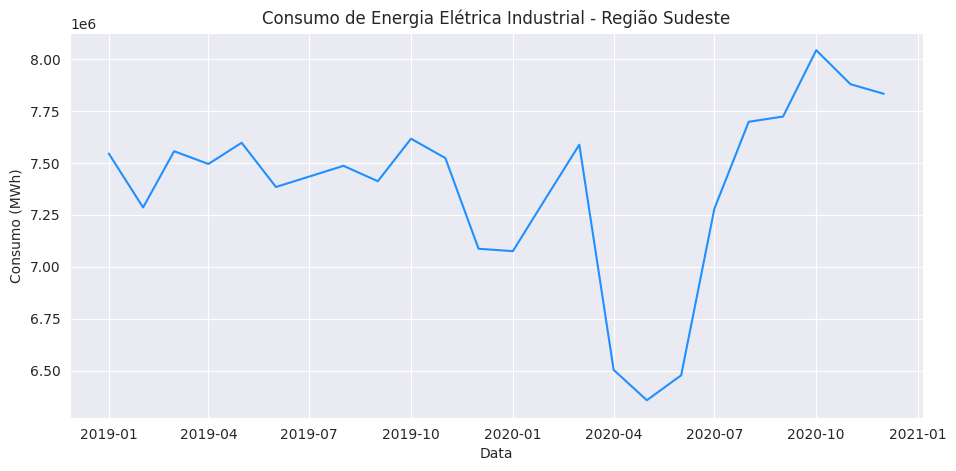

In [45]:
with sns.axes_style('darkgrid'):
  grafico = sns.lineplot(data=energia_19_20, x='referencia', y='industrial', color='dodgerblue')
  grafico.set(title='Consumo de Energia Elétrica Industrial - Região Sudeste', xlabel='Data', ylabel='Consumo (MWh)')
  grafico.figure.set_size_inches(11, 5)

Coeficiente de Pearson entre o consumo de energia elétrica **industrial** e a **temperatura** média agregada `temp-media`.

In [46]:
coeficiente_pearson = np.corrcoef(energia_19_20['industrial'], temp_19_20_resam['temp-media'])
print(coeficiente_pearson)

[[1.         0.28732297]
 [0.28732297 1.        ]]


Nesse contexto, a resposta é negativa, visto que há uma correlação frágil entre o consumo de energia elétrica industrial e a temperatura,r = 0,29. Apesar de os gráficos de linha revelarem padrões semelhantes nas tendências e sazonalidades para a temperatura e o consumo de energia elétrica, não há uma relação substancial entre esses comportamentos, conforme indicado pelo coeficiente de Pearson.